資料前處理

In [22]:
import numpy as np
import pandas as pd
from sklearn import ensemble, preprocessing, metrics
from sklearn.model_selection import train_test_split

In [2]:
df_7 = pd.read_csv("diabetes.csv")
df_7

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# normalize 正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_8 = scaler.fit_transform(df_7)
df_9 = pd.DataFrame(df_8,columns=df_7.columns)
df_9

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [4]:
df_9.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
X = df_9.drop('Outcome', axis=1)
y = df_9['Outcome']

訓練

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=100,
    max_depth=10, 
    )
rf.fit(X_train, y_train)
print("\n\n\t\t\t ---隨機森林---")
rf_roc_auc = metrics.roc_auc_score(y_test, rf.predict(X_test))
print("隨機森林 AUC = %2.2f" % rf_roc_auc)
print(metrics.classification_report(y_test, rf.predict(X_test)))



			 ---隨機森林---
隨機森林 AUC = 0.73
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       154
         1.0       0.71      0.57      0.63        77

    accuracy                           0.78       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.78      0.77       231



In [36]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

In [37]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

In [38]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

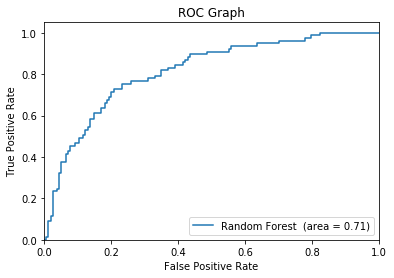

In [39]:
plt.plot(rf_fpr, rf_tpr, label='Random Forest  (area = %0.2f)' % rf_roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc='lower right')
plt.show()